In [61]:
import pandas as pd

In [62]:
df_fake = pd.read_csv('dataset/Fake.csv')
df_true = pd.read_csv('dataset/True.csv')

In [63]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [64]:
print(df_fake.shape)
print(df_true.shape)

(23481, 4)
(21417, 4)


In [65]:
# add labels and concatinate
df_fake['label'] = 0  # fakes
df_true['label'] = 1  # real news

df = pd.concat([df_fake, df_true], axis=0)
df = df.sample(frac=1).reset_index(drop=True)

In [66]:
df.head()

,title,text,subject,date,label
0,Paul Ryan: The Republican Party Is More Impor...,"On Sunday, House Speaker Paul Ryan stated that...",News,"June 19, 2016",0
1,"EU defends Iran deal despite Trump, appeals to...",LUXEMBOURG (Reuters) - The European Union on M...,worldnews,"October 16, 2017",1
2,New York Mayor de Blasio wins re-election in w...,NEW YORK (Reuters) - Democratic New York City ...,politicsNews,"November 7, 2017",1
3,OUCH! Paul Joseph Watson DESTROYS MTV’s Racist...,Enjoy,left-news,"Dec 26, 2016",0
4,Rouhani says IAEA unlikely to accept U.S. dema...,ANKARA (Reuters) - Iranian President Hassan Ro...,worldnews,"August 29, 2017",1


In [67]:
df.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [68]:
df.dtypes

title      object
text       object
subject    object
date       object
label       int64
dtype: object

# Date preparation (unsed)

In [69]:
len(df['date'].unique())

2397

In [70]:
df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce') #there are a lot of inccorect values

In [71]:
df.dtypes

title              object
text               object
subject            object
date       datetime64[ns]
label               int64
dtype: object

In [72]:
len(df['date'].unique())

1011

In [73]:
df[df['date'].isna()].head(10)

,title,text,subject,date,label
844,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,NaT,0
2116,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,NaT,0
5387,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,NaT,0
10272,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,NaT,0
10824,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,NaT,0
14318,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,NaT,0
16989,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,NaT,0
21188,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,NaT,0
22904,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,NaT,0
24943,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,NaT,0


In [74]:
df.isna().sum()

title       0
text        0
subject     0
date       10
label       0
dtype: int64

In [75]:
df = df.dropna(subset=['date'])

In [76]:
# add date features
df['year'] = df['date'].dt.year.astype('int32')
df['month'] = df['date'].dt.month.astype('int32')
df['day'] = df['date'].dt.day.astype('int32')

In [77]:
df.head()

,title,text,subject,date,label,year,month,day
0,Paul Ryan: The Republican Party Is More Impor...,"On Sunday, House Speaker Paul Ryan stated that...",News,2016-06-19,0,2016,6,19
1,"EU defends Iran deal despite Trump, appeals to...",LUXEMBOURG (Reuters) - The European Union on M...,worldnews,2017-10-16,1,2017,10,16
2,New York Mayor de Blasio wins re-election in w...,NEW YORK (Reuters) - Democratic New York City ...,politicsNews,2017-11-07,1,2017,11,7
3,OUCH! Paul Joseph Watson DESTROYS MTV’s Racist...,Enjoy,left-news,2016-12-26,0,2016,12,26
4,Rouhani says IAEA unlikely to accept U.S. dema...,ANKARA (Reuters) - Iranian President Hassan Ro...,worldnews,2017-08-29,1,2017,8,29


In [78]:
df.drop('date', axis=1, inplace=True)

In [79]:
df.head()

,title,text,subject,label,year,month,day
0,Paul Ryan: The Republican Party Is More Impor...,"On Sunday, House Speaker Paul Ryan stated that...",News,0,2016,6,19
1,"EU defends Iran deal despite Trump, appeals to...",LUXEMBOURG (Reuters) - The European Union on M...,worldnews,1,2017,10,16
2,New York Mayor de Blasio wins re-election in w...,NEW YORK (Reuters) - Democratic New York City ...,politicsNews,1,2017,11,7
3,OUCH! Paul Joseph Watson DESTROYS MTV’s Racist...,Enjoy,left-news,0,2016,12,26
4,Rouhani says IAEA unlikely to accept U.S. dema...,ANKARA (Reuters) - Iranian President Hassan Ro...,worldnews,1,2017,8,29


In [80]:
df.dtypes

title      object
text       object
subject    object
label       int64
year        int32
month       int32
day         int32
dtype: object

# Column prep

<Axes: xlabel='subject'>

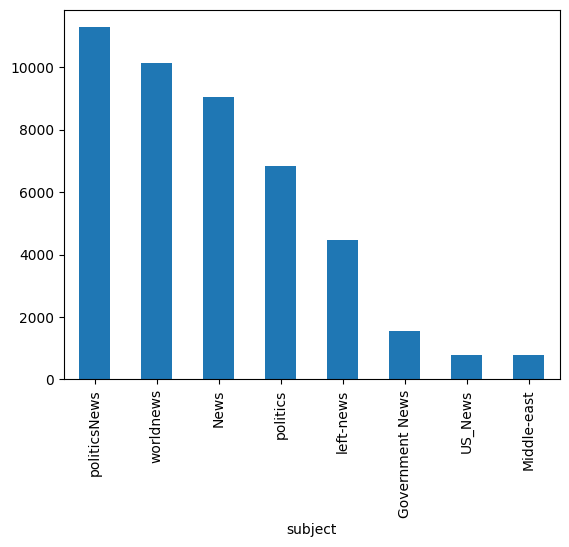

In [81]:
df['subject'].value_counts().plot(kind='bar')

In [82]:
# subject column doesn't contain valuable information
df.drop('subject', axis=1, inplace=True)

In [83]:
df.head()

,title,text,label,year,month,day
0,Paul Ryan: The Republican Party Is More Impor...,"On Sunday, House Speaker Paul Ryan stated that...",0,2016,6,19
1,"EU defends Iran deal despite Trump, appeals to...",LUXEMBOURG (Reuters) - The European Union on M...,1,2017,10,16
2,New York Mayor de Blasio wins re-election in w...,NEW YORK (Reuters) - Democratic New York City ...,1,2017,11,7
3,OUCH! Paul Joseph Watson DESTROYS MTV’s Racist...,Enjoy,0,2016,12,26
4,Rouhani says IAEA unlikely to accept U.S. dema...,ANKARA (Reuters) - Iranian President Hassan Ro...,1,2017,8,29


In [84]:
len(df.text[124])

2146

In [85]:
len(df.title[1466])

91

In [86]:
# text can be too long, takes a lot of time to process
df.drop('text', axis=1, inplace=True)

In [87]:
df.head()

,title,label,year,month,day
0,Paul Ryan: The Republican Party Is More Impor...,0,2016,6,19
1,"EU defends Iran deal despite Trump, appeals to...",1,2017,10,16
2,New York Mayor de Blasio wins re-election in w...,1,2017,11,7
3,OUCH! Paul Joseph Watson DESTROYS MTV’s Racist...,0,2016,12,26
4,Rouhani says IAEA unlikely to accept U.S. dema...,1,2017,8,29


In [88]:
corr = df.select_dtypes('number').corr()
corr

,label,year,month,day
label,1.000000,0.407359,0.277868,0.006633
year,0.407359,1.000000,0.092239,-0.004292
month,0.277868,0.092239,1.000000,-0.031919
day,0.006633,-0.004292,-0.031919,1.000000


In [89]:
# day has almost no correlation with label
df.drop('day', axis=1, inplace=True)

# Tokenization

In [90]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [91]:
def preprocess_text(text):
    # delete symbols and make lowercase 
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A).lower()

    # delete stop words
    stop_words = set(stopwords.words('english'))
    
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words]
    
    # lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    
    return ' '.join(tokens)

In [92]:
# Применение к тексту
df['processed_title'] = df['title'].apply(preprocess_text)

In [93]:
df.head()

,title,label,year,month,processed_title
0,Paul Ryan: The Republican Party Is More Impor...,0,2016,6,paul ryan republican party important united st...
1,"EU defends Iran deal despite Trump, appeals to...",1,2017,10,eu defends iran deal despite trump appeal u co...
2,New York Mayor de Blasio wins re-election in w...,1,2017,11,new york mayor de blasio win reelection widely...
3,OUCH! Paul Joseph Watson DESTROYS MTV’s Racist...,0,2016,12,ouch paul joseph watson destroys mtvs racist p...
4,Rouhani says IAEA unlikely to accept U.S. dema...,1,2017,8,rouhani say iaea unlikely accept u demand iran...


In [94]:
df.drop('title', axis=1, inplace=True)

In [95]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [96]:
df.dtypes

label               int64
year                int32
month               int32
processed_title    object
dtype: object

In [97]:
type(df['processed_title'][0])

str

In [98]:
df['processed_title'].str.len().max()

237

In [99]:
from matplotlib import pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Frequency')

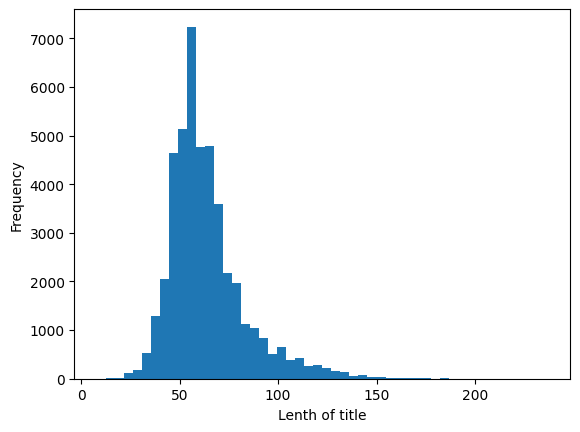

In [100]:
lengths = df['processed_title'].str.len()
plt.hist(lengths, bins=50)

plt.xlabel('Lenth of title')
plt.ylabel('Frequency')
#plt.title('Distribution of Processed Title Lengths in ISOT Dataset')


{'whiskers': [<matplotlib.lines.Line2D at 0x1c38bfb8350>,
 'caps': [<matplotlib.lines.Line2D at 0x1c38bfb9690>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c3896cf050>],
 'medians': [<matplotlib.lines.Line2D at 0x1c38bfba450>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c38bfb8d10>],
 'means': []}

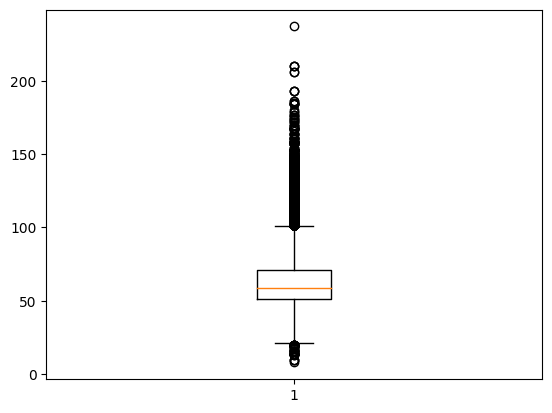

In [101]:
plt.boxplot(lengths)

In [102]:
# set params
MAX_WORDS = 10000  
MAX_SEQ_LEN = 100

In [103]:
tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(df['processed_title'])


In [104]:
sequences = tokenizer.texts_to_sequences(df['processed_title'])
X = pad_sequences(sequences, maxlen=MAX_SEQ_LEN)

In [105]:
X.shape

(44888, 100)

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, df['label'].values, test_size=0.2)

In [108]:
X_train.shape

(35910, 100)

I've end up not using data column. Despite the moderate correlation with the target variable, they can make artificial dependencies, associated with temporary trends, and not with the content of the text Also their usage requires more complex architecture of the model (multiple inputs).

# Models

In [109]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, Dropout, Bidirectional, GRU

In [110]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [111]:
# Stacked simple RNN + dropout
model1 = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_SEQ_LEN),
    SimpleRNN(64, activation='tanh', return_sequences=True),
    Dropout(0.3),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])


model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history1 = model1.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=callback
)

Epoch 1/10
449/449 [==============================] - 41s 85ms/step - loss: 0.1882 - accuracy: 0.9206 - val_loss: 0.1646 - val_accuracy: 0.9368
Epoch 2/10
449/449 [==============================] - 39s 86ms/step - loss: 0.0552 - accuracy: 0.9812 - val_loss: 0.2081 - val_accuracy: 0.9318
Epoch 3/10
449/449 [==============================] - 39s 86ms/step - loss: 0.0194 - accuracy: 0.9935 - val_loss: 0.1967 - val_accuracy: 0.9475


In [112]:
# Stacked LSTM + dropout
model2 = Sequential([
    Embedding(MAX_WORDS, 128, input_length=MAX_SEQ_LEN),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history2 = model2.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=callback
)

Epoch 1/10
449/449 [==============================] - 153s 329ms/step - loss: 0.1967 - accuracy: 0.9163 - val_loss: 0.1299 - val_accuracy: 0.9483
Epoch 2/10
449/449 [==============================] - 145s 324ms/step - loss: 0.0757 - accuracy: 0.9722 - val_loss: 0.1281 - val_accuracy: 0.9538
Epoch 3/10
449/449 [==============================] - 145s 322ms/step - loss: 0.0430 - accuracy: 0.9850 - val_loss: 0.1611 - val_accuracy: 0.9520
Epoch 4/10
449/449 [==============================] - 146s 325ms/step - loss: 0.0251 - accuracy: 0.9914 - val_loss: 0.1889 - val_accuracy: 0.9499


In [113]:
# Bidirectional GRU
model3 = Sequential([
    Embedding(MAX_WORDS, 128, input_length=MAX_SEQ_LEN),
    Bidirectional(GRU(64)),
    Dense(1, activation='sigmoid')
])

model3.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history3 = model3.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=callback
)

Epoch 1/10
449/449 [==============================] - 67s 137ms/step - loss: 0.1951 - accuracy: 0.9159 - val_loss: 0.1242 - val_accuracy: 0.9521
Epoch 2/10
449/449 [==============================] - 60s 133ms/step - loss: 0.0695 - accuracy: 0.9743 - val_loss: 0.1295 - val_accuracy: 0.9559
Epoch 3/10
449/449 [==============================] - 59s 132ms/step - loss: 0.0370 - accuracy: 0.9874 - val_loss: 0.1436 - val_accuracy: 0.9559


# Tuning hyperparameters 

In [114]:
# with RMSprop optimizer instead of Adam
model3.compile(
    optimizer='RMSprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history4 = model3.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=callback
)

Epoch 1/10
449/449 [==============================] - 60s 123ms/step - loss: 0.0152 - accuracy: 0.9950 - val_loss: 0.1806 - val_accuracy: 0.9536
Epoch 2/10
449/449 [==============================] - 55s 121ms/step - loss: 0.0103 - accuracy: 0.9972 - val_loss: 0.2094 - val_accuracy: 0.9502
Epoch 3/10
449/449 [==============================] - 54s 121ms/step - loss: 0.0075 - accuracy: 0.9980 - val_loss: 0.2225 - val_accuracy: 0.9539


In [115]:
# with batch_size=128 instead of 64
model3.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history5 = model3.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    callbacks=callback
)

Epoch 1/10
225/225 [==============================] - 66s 268ms/step - loss: 0.0138 - accuracy: 0.9959 - val_loss: 0.2150 - val_accuracy: 0.9479
Epoch 2/10
225/225 [==============================] - 60s 267ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.2475 - val_accuracy: 0.9500
Epoch 3/10
225/225 [==============================] - 61s 273ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.2791 - val_accuracy: 0.9458


In [116]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [117]:
# with reducing LR on plateau
callbacks = [
    EarlyStopping(patience=2),  
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)  
]

model3.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history6 = model3.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=callback
)

Epoch 1/10
449/449 [==============================] - 69s 141ms/step - loss: 0.0076 - accuracy: 0.9975 - val_loss: 0.2611 - val_accuracy: 0.9489
Epoch 2/10
449/449 [==============================] - 62s 137ms/step - loss: 0.0057 - accuracy: 0.9981 - val_loss: 0.3037 - val_accuracy: 0.9458
Epoch 3/10
449/449 [==============================] - 62s 139ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.2952 - val_accuracy: 0.9440


# Simple models

In [118]:
# simple RNN
simple_model1 = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_SEQ_LEN),
    SimpleRNN(64, activation='tanh'),
    Dense(1, activation='sigmoid')
])

simple_model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history7 = simple_model1.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=callback
)

Epoch 1/10
449/449 [==============================] - 27s 56ms/step - loss: 0.1961 - accuracy: 0.9204 - val_loss: 0.1341 - val_accuracy: 0.9468
Epoch 2/10
449/449 [==============================] - 25s 55ms/step - loss: 0.0526 - accuracy: 0.9824 - val_loss: 0.1426 - val_accuracy: 0.9522
Epoch 3/10
449/449 [==============================] - 25s 56ms/step - loss: 0.0172 - accuracy: 0.9952 - val_loss: 0.1506 - val_accuracy: 0.9547


In [119]:
# simple LSTM
simple_model2 = Sequential([
    Embedding(MAX_WORDS, 128, input_length=MAX_SEQ_LEN),
    LSTM(128),
    Dense(1, activation='sigmoid')
])

simple_model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history8 = simple_model2.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=callback
)

Epoch 1/10
449/449 [==============================] - 96s 208ms/step - loss: 0.1863 - accuracy: 0.9267 - val_loss: 0.1355 - val_accuracy: 0.9474
Epoch 2/10
449/449 [==============================] - 92s 205ms/step - loss: 0.0712 - accuracy: 0.9735 - val_loss: 0.1228 - val_accuracy: 0.9534
Epoch 3/10
449/449 [==============================] - 92s 205ms/step - loss: 0.0374 - accuracy: 0.9871 - val_loss: 0.1428 - val_accuracy: 0.9524
Epoch 4/10
449/449 [==============================] - 93s 207ms/step - loss: 0.0218 - accuracy: 0.9928 - val_loss: 0.2113 - val_accuracy: 0.9496


In [120]:
# simple GRU
simple_model3 = Sequential([
    Embedding(MAX_WORDS, 128, input_length=MAX_SEQ_LEN),
    GRU(64),
    Dense(1, activation='sigmoid')
])

simple_model3.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history9 = simple_model3.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=callback
)

Epoch 1/10
449/449 [==============================] - 48s 101ms/step - loss: 0.1895 - accuracy: 0.9191 - val_loss: 0.1402 - val_accuracy: 0.9436
Epoch 2/10
449/449 [==============================] - 45s 99ms/step - loss: 0.0682 - accuracy: 0.9755 - val_loss: 0.1272 - val_accuracy: 0.9524
Epoch 3/10
449/449 [==============================] - 45s 100ms/step - loss: 0.0620 - accuracy: 0.9791 - val_loss: 0.1478 - val_accuracy: 0.9506
Epoch 4/10
449/449 [==============================] - 45s 100ms/step - loss: 0.0293 - accuracy: 0.9908 - val_loss: 0.1645 - val_accuracy: 0.9521


# Plots

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


In [123]:
my_models_histories = [
    {'model': model1, 'name': 'stacked simple RNN + dropout', 'history': history1},
    {'model': model2, 'name': 'stacked LSTM + dropout', 'history': history2},
    {'model': model3, 'name': 'bidirectional GRU', 'history': history3},
]

tuning_histories = [
    {'model': model3, 'name': 'tuning with RMSprop optimizer instead of Adam', 'history': history4},
    {'model': model3, 'name': 'tuning with batch_size=128 instead of 64', 'history': history5},
    {'model': model3, 'name': 'tuning with reducing LR on plateau', 'history': history6},
]

simple_models_histories = [
    {'model': simple_model1, 'name': 'Simple RNN', 'history': history1},
    {'model': simple_model2, 'name': 'Simple LSTM', 'history': history2},
    {'model': simple_model3, 'name': 'Simple GRU GRU', 'history': history3},
]

In [124]:
# Generate classification reports
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)
    print(classification_report(y_test, y_pred_binary))
    print("\n" + "="*60 + "\n")


In [129]:
def make_plots(histories):
    plt.figure(figsize=(10, 6))
    for entry in histories:
        plt.plot(entry['history'].history['accuracy'], 
                 linestyle='--', 
                 label=f"{entry['name']} (Train)")
        plt.plot(entry['history'].history['val_accuracy'], 
                 linestyle='-', 
                 label=f"{entry['name']} (Val)")

    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.grid(True, alpha=0.3)


    # Create figure for loss plots
    plt.figure(figsize=(10, 6))
    for entry in histories:
        plt.plot(entry['history'].history['loss'], 
                 linestyle='--', 
                 label=f"{entry['name']} (Train)")
        plt.plot(entry['history'].history['val_loss'], 
                 linestyle='-', 
                 label=f"{entry['name']} (Val)")

    plt.title('Model Loss Comparison')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.grid(True, alpha=0.3)


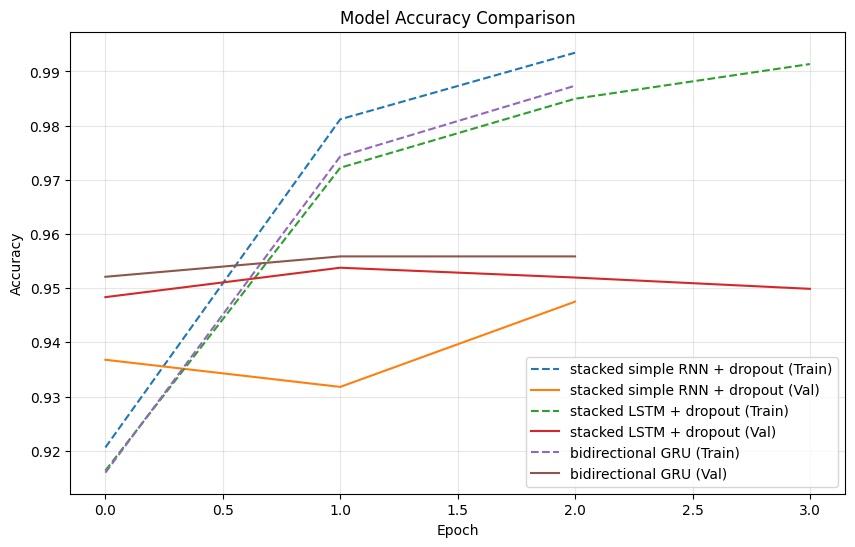

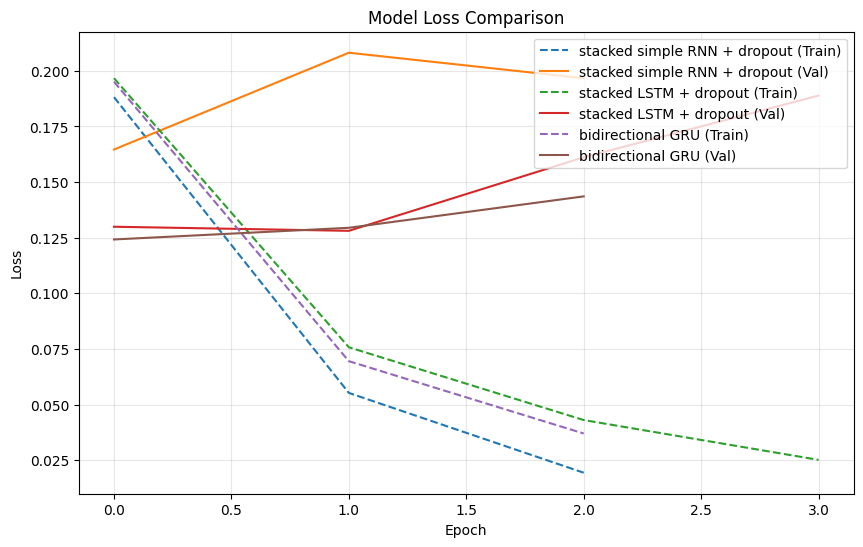

In [130]:
make_plots(my_models_histories)

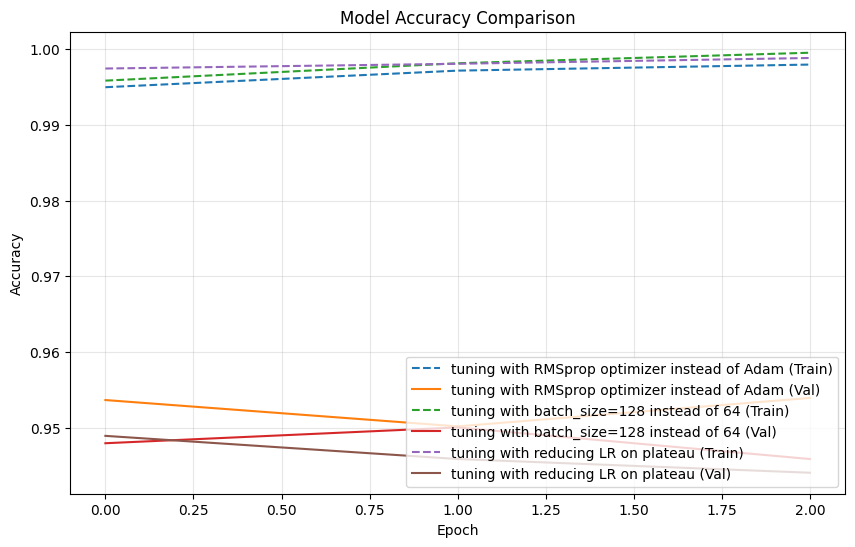

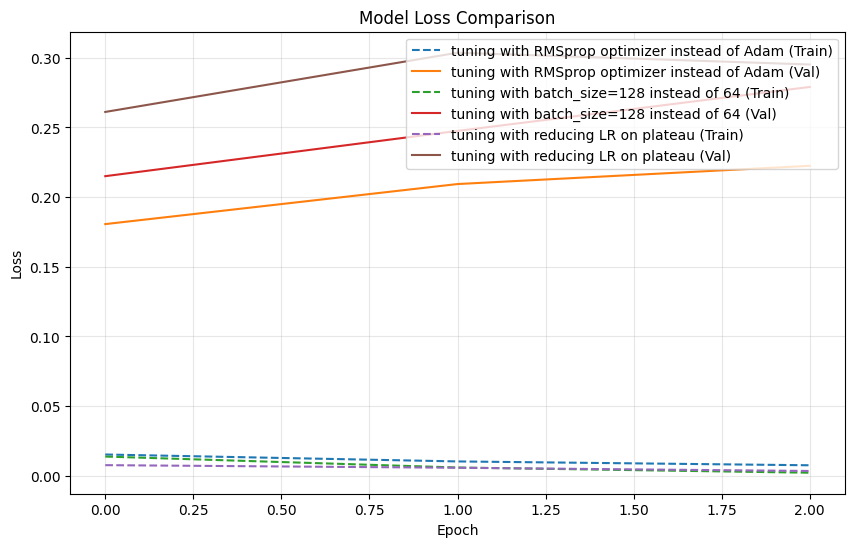

In [131]:
make_plots(tuning_histories)

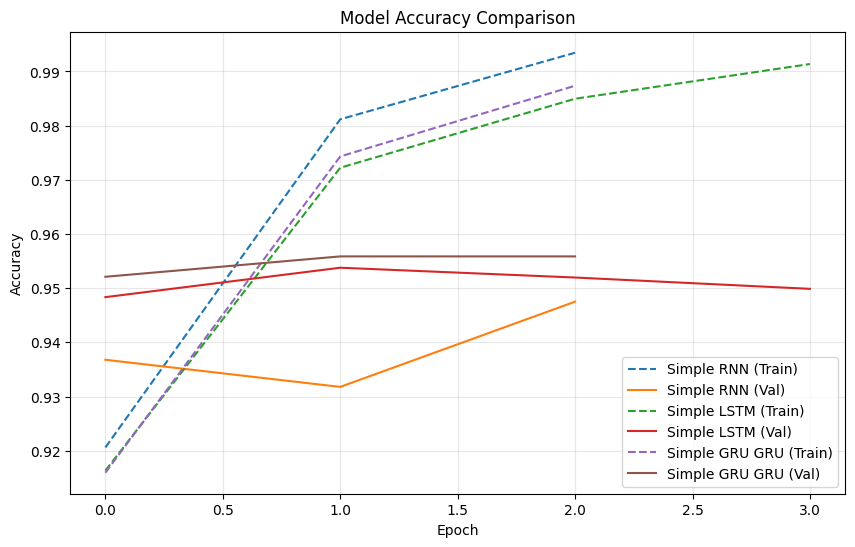

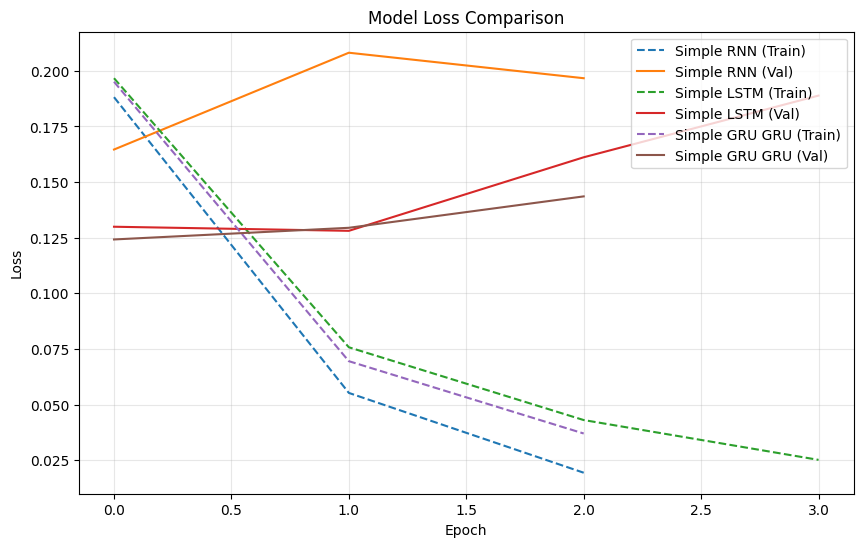

In [132]:
make_plots(simple_models_histories)

In [133]:
for entry in my_models_histories:
    print(f"{entry['name']} сlassification кeport:")
    evaluate_model(entry['model'], X_test, y_test)

stacked simple RNN + dropout сlassification кeport:
281/281 [==============================] - 4s 15ms/step
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      4694
           1       0.92      0.97      0.94      4284

    accuracy                           0.94      8978
   macro avg       0.94      0.95      0.94      8978
weighted avg       0.95      0.94      0.94      8978



stacked LSTM + dropout сlassification кeport:
281/281 [==============================] - 18s 62ms/step
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4694
           1       0.93      0.96      0.94      4284

    accuracy                           0.95      8978
   macro avg       0.95      0.95      0.95      8978
weighted avg       0.95      0.95      0.95      8978



bidirectional GRU сlassification кeport:
281/281 [==============================] - 6s 20ms/step
              precision    recall 

In [134]:
for entry in simple_models_histories:
    print(f"{entry['name']} сlassification кeport:")
    evaluate_model(entry['model'], X_test, y_test)

Simple RNN сlassification кeport:
281/281 [==============================] - 3s 11ms/step
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4694
           1       0.94      0.96      0.95      4284

    accuracy                           0.95      8978
   macro avg       0.95      0.95      0.95      8978
weighted avg       0.95      0.95      0.95      8978



Simple LSTM сlassification кeport:
281/281 [==============================] - 12s 40ms/step
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      4694
           1       0.94      0.95      0.95      4284

    accuracy                           0.95      8978
   macro avg       0.95      0.95      0.95      8978
weighted avg       0.95      0.95      0.95      8978



Simple GRU GRU сlassification кeport:
281/281 [==============================] - 6s 20ms/step
              precision    recall  f1-score   support

           